In [2]:
import os
import pandas as pd
import numpy as np
import warnings
import datetime
from utils.Preprocessing import label_data, all_phase_sort
from utils.sliding_window import sliding_window
from utils.model import model
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")
import tensorflow as tf

In [ ]:
#Label the Raw Data (Directory for Labelled = \Processed\Labelled_Data)
label_data('Organized Data')

In [ ]:
#Sort Data Containing All phases (Directory containing all phases = \Labelled_Data_Complete_Phase(1-4))
all_phase_sort('Processed\Labelled_Data')

In [ ]:
#Loading one mold for training
df=pd.read_csv('Processed/Labelled_Data_Complete_Phase(1-4)/china/abb_china_36475_statistics.csv')
df

In [5]:
# Read the CSV file
df = pd.read_csv('Processed/Labelled_Data_Complete_Phase(1-4)/france/loreal_france_119961_statistics.csv')

filtered_rows = df[df['PHASE'].isin([3, 4])]

# Add a random number between -5 and 5 to 'TAV' and 'SHOT_COUNT' columns where 'SHOT_COUNT' is not zero
filtered_rows.loc[filtered_rows['SHOT_COUNT'] != 0, 'TAV'] = filtered_rows['TAV'] + np.random.randint(-5, 6, size=len(filtered_rows))
filtered_rows.loc[filtered_rows['SHOT_COUNT'] != 0, 'SHOT_COUNT'] = filtered_rows['SHOT_COUNT'] + np.random.randint(-5, 6, size=len(filtered_rows))

# Append these rows to the end of the DataFrame
df = df.append(filtered_rows)
df

,HOUR,MOLD_ID,CT,TAV,SHOT_COUNT,PHASE
0,2021-04-29 07:00:00,119961,484.0,229.0,4,1
1,2021-04-29 08:00:00,119961,0.0,233.0,0,1
2,2021-04-29 09:00:00,119961,0.0,233.0,0,1
3,2021-04-29 10:00:00,119961,0.0,232.0,0,1
4,2021-04-29 11:00:00,119961,0.0,232.0,0,1
...,...,...,...,...,...,...
13948,2023-04-13 21:00:00,119961,297.0,364.0,120,4
13949,2023-04-13 22:00:00,119961,297.0,370.0,126,4
13950,2023-04-13 23:00:00,119961,296.0,366.0,125,4
13951,2023-04-14 00:00:00,119961,296.0,362.0,119,4


In [6]:
df.to_csv('Modified_loreal_119961.csv', index=False)

In [7]:
#Creating a sliding window 
window_size= 720 #window size is in hours (1D= 24, 1W=168, 1M=720)
x,y = sliding_window(df,window_size)

In [8]:
lstm = model(x,y,'adam')

In [9]:
# Train the model
lstm.fit(x, y, epochs=30, batch_size=12, verbose=2)

Epoch 1/30
2486/2486 - 491s - loss: 0.4172 - accuracy: 0.8595
Epoch 2/30
2486/2486 - 445s - loss: 0.2555 - accuracy: 0.9071
Epoch 3/30
2486/2486 - 466s - loss: 0.2141 - accuracy: 0.9257
Epoch 4/30
2486/2486 - 433s - loss: 0.2075 - accuracy: 0.9258
Epoch 5/30
2486/2486 - 462s - loss: 0.2009 - accuracy: 0.9256
Epoch 6/30
2486/2486 - 496s - loss: 0.2082 - accuracy: 0.9221
Epoch 7/30
2486/2486 - 458s - loss: 0.1966 - accuracy: 0.9284
Epoch 8/30
2486/2486 - 468s - loss: 0.1827 - accuracy: 0.9317
Epoch 9/30
2486/2486 - 432s - loss: 0.1659 - accuracy: 0.9372
Epoch 10/30
2486/2486 - 426s - loss: 0.1650 - accuracy: 0.9402
Epoch 11/30
2486/2486 - 444s - loss: 0.1557 - accuracy: 0.9439
Epoch 12/30
2486/2486 - 435s - loss: 0.1509 - accuracy: 0.9452
Epoch 13/30
2486/2486 - 434s - loss: 0.1518 - accuracy: 0.9448
Epoch 14/30
2486/2486 - 516s - loss: 0.1509 - accuracy: 0.9435
Epoch 15/30
2486/2486 - 505s - loss: 0.1614 - accuracy: 0.9396
Epoch 16/30
2486/2486 - 571s - loss: 0.1433 - accuracy: 0.9470
E

In [10]:
lstm.save('Weights/Modified_loreal_119961.h5')

537/537 - 86s - loss: 4.7442 - accuracy: 0.2158


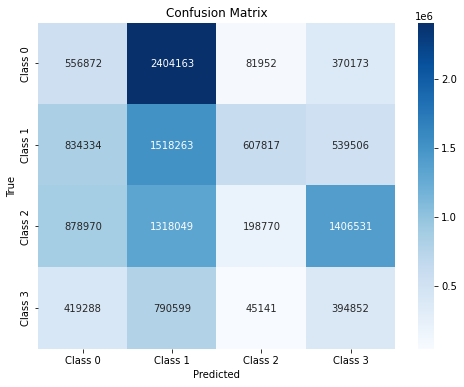

File: abb_china_36405_statistics.csv, Loss: 4.744234561920166, Accuracy: 21.58
Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.16      0.18   3413160
           1       0.25      0.43      0.32   3499920
           2       0.21      0.05      0.08   3802320
           3       0.15      0.24      0.18   1649880

    accuracy                           0.22  12365280
   macro avg       0.20      0.22      0.19  12365280
weighted avg       0.21      0.22      0.19  12365280

550/550 - 85s - loss: 5.3544 - accuracy: 0.2616


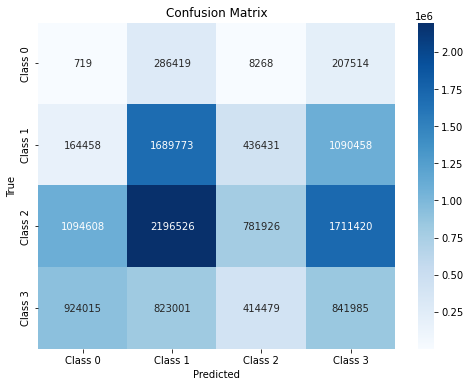

File: abb_china_36435_statistics.csv, Loss: 5.354405879974365, Accuracy: 26.16
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00    502920
           1       0.34      0.50      0.40   3381120
           2       0.48      0.14      0.21   5784480
           3       0.22      0.28      0.25   3003480

    accuracy                           0.26  12672000
   macro avg       0.26      0.23      0.22  12672000
weighted avg       0.36      0.26      0.26  12672000

475/475 - 56s - loss: 5.6627 - accuracy: 0.2363


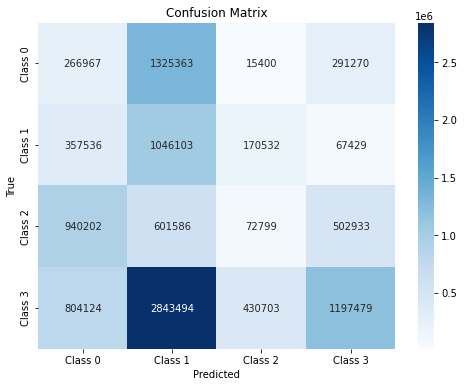

File: abb_china_36440_statistics.csv, Loss: 5.662699222564697, Accuracy: 23.63
Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.14      0.13   1899000
           1       0.18      0.64      0.28   1641600
           2       0.11      0.03      0.05   2117520
           3       0.58      0.23      0.33   5275800

    accuracy                           0.24  10933920
   macro avg       0.24      0.26      0.20  10933920
weighted avg       0.35      0.24      0.23  10933920

464/464 - 56s - loss: 4.8808 - accuracy: 0.3159


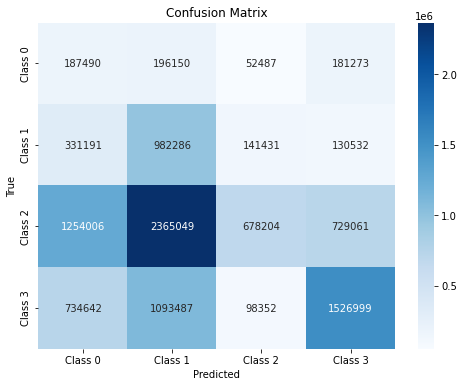

File: abb_china_36445_statistics.csv, Loss: 4.880848407745361, Accuracy: 31.59
Classification Report:
               precision    recall  f1-score   support

           0       0.07      0.30      0.12    617400
           1       0.21      0.62      0.32   1585440
           2       0.70      0.13      0.23   5026320
           3       0.59      0.44      0.51   3453480

    accuracy                           0.32  10682640
   macro avg       0.40      0.38      0.29  10682640
weighted avg       0.56      0.32      0.32  10682640

489/489 - 64s - loss: 3.7897 - accuracy: 0.2779


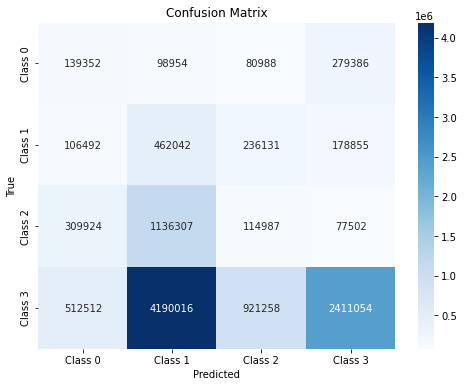

File: abb_china_36450_statistics.csv, Loss: 3.7897350788116455, Accuracy: 27.79
Classification Report:
               precision    recall  f1-score   support

           0       0.13      0.23      0.17    598680
           1       0.08      0.47      0.13    983520
           2       0.08      0.07      0.08   1638720
           3       0.82      0.30      0.44   8034840

    accuracy                           0.28  11255760
   macro avg       0.28      0.27      0.20  11255760
weighted avg       0.61      0.28      0.35  11255760

490/490 - 75s - loss: 6.5601 - accuracy: 0.2180


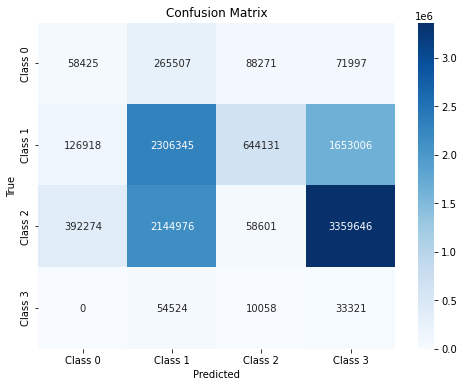

File: abb_china_36455_statistics.csv, Loss: 6.560053825378418, Accuracy: 21.8
Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.12      0.11    484200
           1       0.48      0.49      0.49   4730400
           2       0.07      0.01      0.02   5955497
           3       0.01      0.34      0.01     97903

    accuracy                           0.22  11268000
   macro avg       0.17      0.24      0.16  11268000
weighted avg       0.25      0.22      0.22  11268000

508/508 - 60s - loss: 6.1492 - accuracy: 0.1940


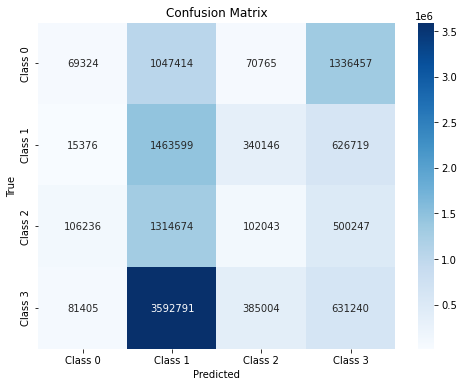

File: abb_china_36460_statistics.csv, Loss: 6.149205207824707, Accuracy: 19.4
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.03      0.05   2523960
           1       0.20      0.60      0.30   2445840
           2       0.11      0.05      0.07   2023200
           3       0.20      0.13      0.16   4690440

    accuracy                           0.19  11683440
   macro avg       0.19      0.20      0.14  11683440
weighted avg       0.20      0.19      0.15  11683440

549/549 - 60s - loss: 0.4278 - accuracy: 0.8679


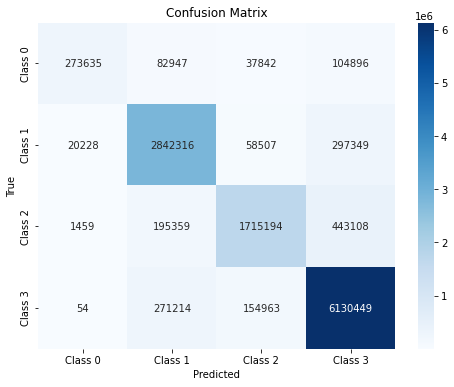

File: abb_china_36475_statistics.csv, Loss: 0.4278174042701721, Accuracy: 86.79
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.55      0.69    499320
           1       0.84      0.88      0.86   3218400
           2       0.87      0.73      0.79   2355120
           3       0.88      0.93      0.91   6556680

    accuracy                           0.87  12629520
   macro avg       0.88      0.77      0.81  12629520
weighted avg       0.87      0.87      0.86  12629520

476/476 - 48s - loss: 2.0706 - accuracy: 0.5678


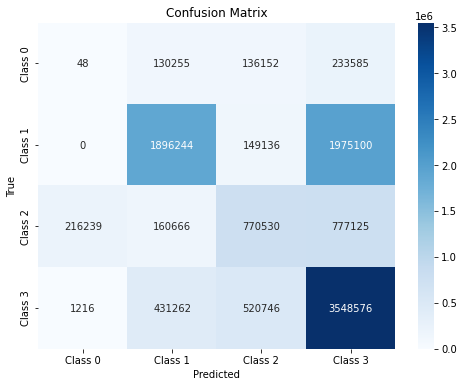

File: abb_china_36480_statistics.csv, Loss: 2.0705575942993164, Accuracy: 56.78
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00    500040
           1       0.72      0.47      0.57   4020480
           2       0.49      0.40      0.44   1924560
           3       0.54      0.79      0.64   4501800

    accuracy                           0.57  10946880
   macro avg       0.44      0.42      0.41  10946880
weighted avg       0.58      0.57      0.55  10946880

484/484 - 48s - loss: 4.0696 - accuracy: 0.3332


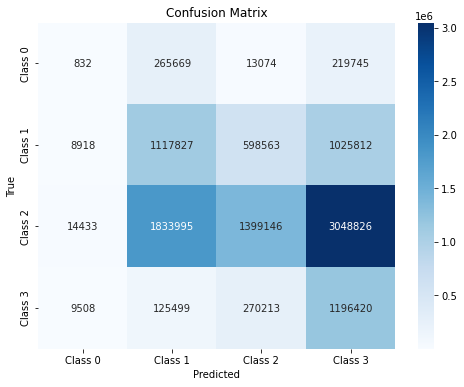

File: abb_china_36497_statistics.csv, Loss: 4.069644927978516, Accuracy: 33.32
Classification Report:
               precision    recall  f1-score   support

           0       0.02      0.00      0.00    499320
           1       0.33      0.41      0.37   2751120
           2       0.61      0.22      0.33   6296400
           3       0.22      0.75      0.34   1601640

    accuracy                           0.33  11148480
   macro avg       0.30      0.34      0.26  11148480
weighted avg       0.46      0.33      0.32  11148480

495/495 - 50s - loss: 3.6642 - accuracy: 0.3906


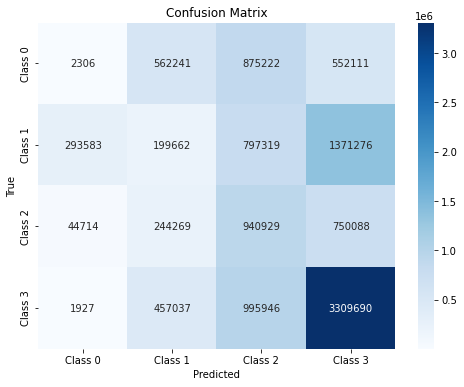

File: abb_china_36501_statistics.csv, Loss: 3.6642446517944336, Accuracy: 39.06
Classification Report:
               precision    recall  f1-score   support

           0       0.01      0.00      0.00   1991880
           1       0.14      0.08      0.10   2661840
           2       0.26      0.48      0.34   1980000
           3       0.55      0.69      0.62   4764600

    accuracy                           0.39  11398320
   macro avg       0.24      0.31      0.26  11398320
weighted avg       0.31      0.39      0.34  11398320

457/457 - 49s - loss: 4.4714 - accuracy: 0.2262


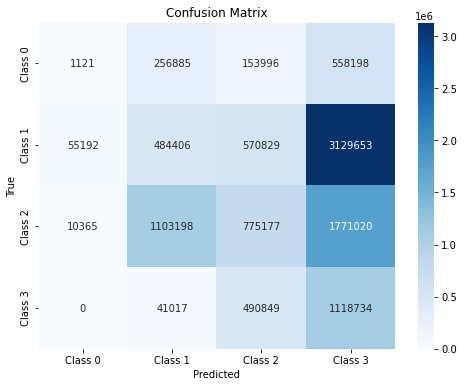

File: abb_china_36505_statistics.csv, Loss: 4.4713544845581055, Accuracy: 22.62
Classification Report:
               precision    recall  f1-score   support

           0       0.02      0.00      0.00    970200
           1       0.26      0.11      0.16   4240080
           2       0.39      0.21      0.27   3659760
           3       0.17      0.68      0.27   1650600

    accuracy                           0.23  10520640
   macro avg       0.21      0.25      0.18  10520640
weighted avg       0.27      0.23      0.20  10520640



In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have already trained and defined your model
from keras.models import load_model
model=load_model('Weights/abb_china_36475.h5')

# Folder containing CSV files
folder_path = 'Organized Data/china/'

# Loop through all CSV files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        # Construct the full path to the CSV file
        file_path = os.path.join(folder_path, filename)

        # Read the CSV file
        df = pd.read_csv(file_path)
        df.fillna(0, inplace=True)
        df = df[['HOUR', 'CT', 'TAV', 'SHOT_COUNT', 'PHASE']]

        # Assuming df is your DataFrame and 'HOUR' is your time column
        df['HOUR'] = pd.to_datetime(df['HOUR'], format='%Y%m%d%H')
        df = df.sort_values('HOUR')
        features_considered = ['CT', 'TAV', 'SHOT_COUNT']

        # One-hot encoding the 'PHASE' feature
        y = pd.get_dummies(df['PHASE']).values

        # Creating the sliding window
        def create_dataset(X, y, time_steps=1):
            Xs, ys = [], []
            for i in range(len(X) - time_steps):
                v = X.iloc[i:(i + time_steps)].values
                Xs.append(v)
                ys.append(y[i:i + time_steps])
            return np.array(Xs), np.array(ys)

        time_steps = 720  # Represents 30 days of hourly data

        # Reshape to [samples, time_steps, n_features]
        X, y = create_dataset(df[features_considered], y, time_steps)

        # Evaluate the model on the data
        loss, accuracy = model.evaluate(X, y, verbose=2)

        # Make predictions
        y_pred = model.predict(X)
        y_true = np.argmax(y, axis=2)
        y_pred = np.argmax(y_pred, axis=2)

        # Generate classification report
        report = classification_report(y_true.flatten(), y_pred.flatten())

        # Generate confusion matrix
        cm = confusion_matrix(y_true.flatten(), y_pred.flatten())

        # Plot the heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[f"Class {i}" for i in range(cm.shape[0])], yticklabels=[f"Class {i}" for i in range(cm.shape[0])])
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

        # Print filename, loss, accuracy, and classification report
        print(f"File: {filename}, Loss: {loss}, Accuracy: {np.round(accuracy * 100, 2)}")
        print("Classification Report:\n", report)
